# 1- Data Importing and Cleaning

Setting KaggleHub Cache Directory in Colab

In [100]:
import os

# Set KaggleHub cache to a directory inside /content/
os.environ["KAGGLEHUB_CACHE"] = "/content/data"

downloading data

In [101]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ivansher/nasa-nearest-earth-objects-1910-2024")

print("Path to dataset files:", path)

Path to dataset files: /content/data/datasets/ivansher/nasa-nearest-earth-objects-1910-2024/versions/2


Exploring directory

In [102]:
import os
import pandas as pd

# List files in the directory
files = os.listdir(path)
print("Available files:", files)

Available files: ['nearest-earth-objects(1910-2024).csv']


Reading data and exploring it

In [103]:
data_path = os.path.join(path, "nearest-earth-objects(1910-2024).csv")

In [104]:
# Read the dataset into a Pandas DataFrame
df = pd.read_csv(data_path)

# Display the first few rows of the dataset
df.head()

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
0,2162117,162117 (1998 SD15),19.14,0.394962,0.883161,Earth,71745.401048,5.814362e+07,False
1,2349507,349507 (2008 QY),18.50,0.530341,1.185878,Earth,109949.757148,5.580105e+07,True
2,2455415,455415 (2003 GA),21.45,0.136319,0.304818,Earth,24865.506798,6.720689e+07,False
3,3132126,(2002 PB),20.63,0.198863,0.444672,Earth,78890.076805,3.039644e+07,False
4,3557844,(2011 DW),22.70,0.076658,0.171412,Earth,56036.519484,6.311863e+07,False


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338199 entries, 0 to 338198
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   neo_id                  338199 non-null  int64  
 1   name                    338199 non-null  object 
 2   absolute_magnitude      338171 non-null  float64
 3   estimated_diameter_min  338171 non-null  float64
 4   estimated_diameter_max  338171 non-null  float64
 5   orbiting_body           338199 non-null  object 
 6   relative_velocity       338199 non-null  float64
 7   miss_distance           338199 non-null  float64
 8   is_hazardous            338199 non-null  bool   
dtypes: bool(1), float64(5), int64(1), object(2)
memory usage: 21.0+ MB


**Observation:**

Number of Records and Columns: The dataset contains 338,199 records and 9 columns.

Colomns with Missing Values: The columns absolute_magnitude, estimated_diameter_min, and estimated_diameter_max have missing values. We need to handle them appropriately.

Categorical Columns: The columns name and orbiting_body are categorical and need to be encoded if they provide any useful variance and contribute to our model's performance.

Unnecessary Columns:
* neo_id: This is just a unique identifier and doesn't provide meaningful information for prediction.
* name: The name of the NEO is just a label and doesn't contribute to our model's performance.
* orbiting_body: If all values are the same (e.g., all NEOs orbit Earth), this column doesn’t provide any useful variance.

Target Column: is_hazardous is a Boolean variable indicating whether a Near-Earth Object (NEO) is hazardous.









In [106]:
# Statistical information
df.describe()

,neo_id,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance
count,3.381990e+05,338171.000000,338171.000000,338171.000000,338199.000000,3.381990e+05
mean,1.759939e+07,22.932525,0.157812,0.352878,51060.662908,4.153535e+07
std,2.287225e+07,2.911216,0.313885,0.701869,26399.238435,2.077399e+07
min,2.000433e+06,9.250000,0.000511,0.001143,203.346433,6.745533e+03
25%,3.373980e+06,20.740000,0.025384,0.056760,30712.031471,2.494540e+07
50%,3.742127e+06,22.800000,0.073207,0.163697,47560.465474,4.332674e+07
75%,5.405374e+07,25.100000,0.189041,0.422708,66673.820614,5.933961e+07
max,5.446281e+07,33.580000,37.545248,83.953727,291781.106613,7.479865e+07


## Handle Missing Values

In [107]:
# Check missing values
print("Missing values per column:\n", df.isnull().sum())

Missing values per column:
 neo_id                     0
name                       0
absolute_magnitude        28
estimated_diameter_min    28
estimated_diameter_max    28
orbiting_body              0
relative_velocity          0
miss_distance              0
is_hazardous               0
dtype: int64


**To handle missing values, we have a couple of options:**


1.   Drop rows with missing values
2.   Fill missing values with the median (The median is a good choice because it is less affected by outliers compared to the mean.)

For this dataset we will we’ll drop the rows

* Since the number of missing values is very small compared to the dataset (~0.008% of total records), removing them won’t significantly impact our analysis.

* This ensures that we only work with complete data and avoid making assumptions about missing values.


In [108]:

# # Option1: Fill with median values for numerical columns
# df["absolute_magnitude"].fillna(df["absolute_magnitude"].median(), inplace=True)
# df["estimated_diameter_min"].fillna(df["estimated_diameter_min"].median(), inplace=True)
# df["estimated_diameter_max"].fillna(df["estimated_diameter_max"].median(), inplace=True)


# Option2: Drop rows with missing values
df.dropna(inplace=True)


In [109]:
# Verify missing values are removed
print("\nMissing values after dropping rows:\n", df.isnull().sum())


Missing values after dropping rows:
 neo_id                    0
name                      0
absolute_magnitude        0
estimated_diameter_min    0
estimated_diameter_max    0
orbiting_body             0
relative_velocity         0
miss_distance             0
is_hazardous              0
dtype: int64


In [110]:
# Dataset shape after dropping rows
print("\nDataset shape after dropping rows:", df.shape)


Dataset shape after dropping rows: (338171, 9)


## Removing unnecessary colomns

* neo_id: This is just a unique identifier and doesn't provide meaningful information for prediction.
* name: The name of the NEO is just a label and doesn't contribute to our model's performance.
* orbiting_body: If all values are the same (e.g., all NEOs orbit Earth), this column doesn’t provide any useful variance.

In [111]:
# To confirm, we can check the unique values in orbiting_body:
print(df["orbiting_body"].unique())


['Earth']


so the all values in this colomn is 'Earth' and it doesn’t provide any useful variance

In [112]:
# Drop unnecessary columns
df.drop(columns=["neo_id", "name", "orbiting_body"], inplace=True)



In [113]:
# Verify the updated DataFrame
df.head()

,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance,is_hazardous
0,19.14,0.394962,0.883161,71745.401048,5.814362e+07,False
1,18.50,0.530341,1.185878,109949.757148,5.580105e+07,True
2,21.45,0.136319,0.304818,24865.506798,6.720689e+07,False
3,20.63,0.198863,0.444672,78890.076805,3.039644e+07,False
4,22.70,0.076658,0.171412,56036.519484,6.311863e+07,False


## Removing duplicate rows

In [114]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 5


In [115]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Verify that duplicates are removed
print(f"Dataset shape after removing duplicates: {df.shape}")


Dataset shape after removing duplicates: (338166, 6)


# 2- Exploratory Data Analysis (EDA)

## Target Class Distribution

Target Distribution:
is_hazardous
False    0.872364
True     0.127636
Name: proportion, dtype: float64


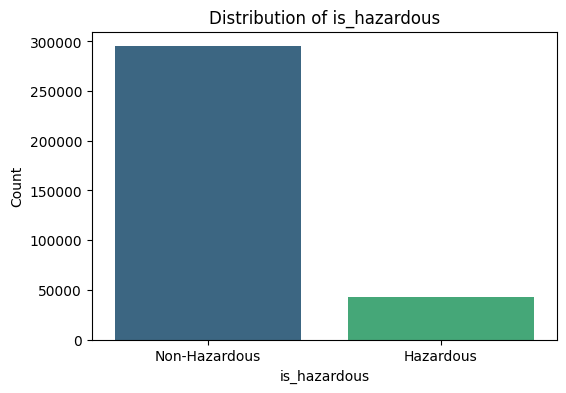

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt

def check_target_imbalance(df, target_column):
    print("Target Distribution:")
    print(df[target_column].value_counts(normalize=True))

    plt.figure(figsize=(6, 4))
    sns.countplot(x=df[target_column], hue=df[target_column], palette="viridis", legend=False)
    plt.title("Distribution of " + target_column)
    plt.xlabel(target_column)
    plt.ylabel("Count")
    plt.xticks([0, 1], ["Non-Hazardous", "Hazardous"])
    plt.show()

# Call the function
check_target_imbalance(df, "is_hazardous")


Interpretation of Class Imbalance
our target distribution shows:

87.2% of NEOs are non-hazardous (False).

12.7% of NEOs are hazardous (True).

This confirms that the dataset is imbalanced, which we will need to address during the data preprocessing phase using techniques like SMOTE (oversampling), undersampling, or class weight adjustments.

Additionally, we must:

Use stratification when splitting the dataset to ensure a representative distribution in training and testing sets.

Evaluate model performance using appropriate metrics like precision, recall, and F1-score, rather than relying solely on accuracy.



## Feature Distributions

 This will show whether features are normally distributed or skewed

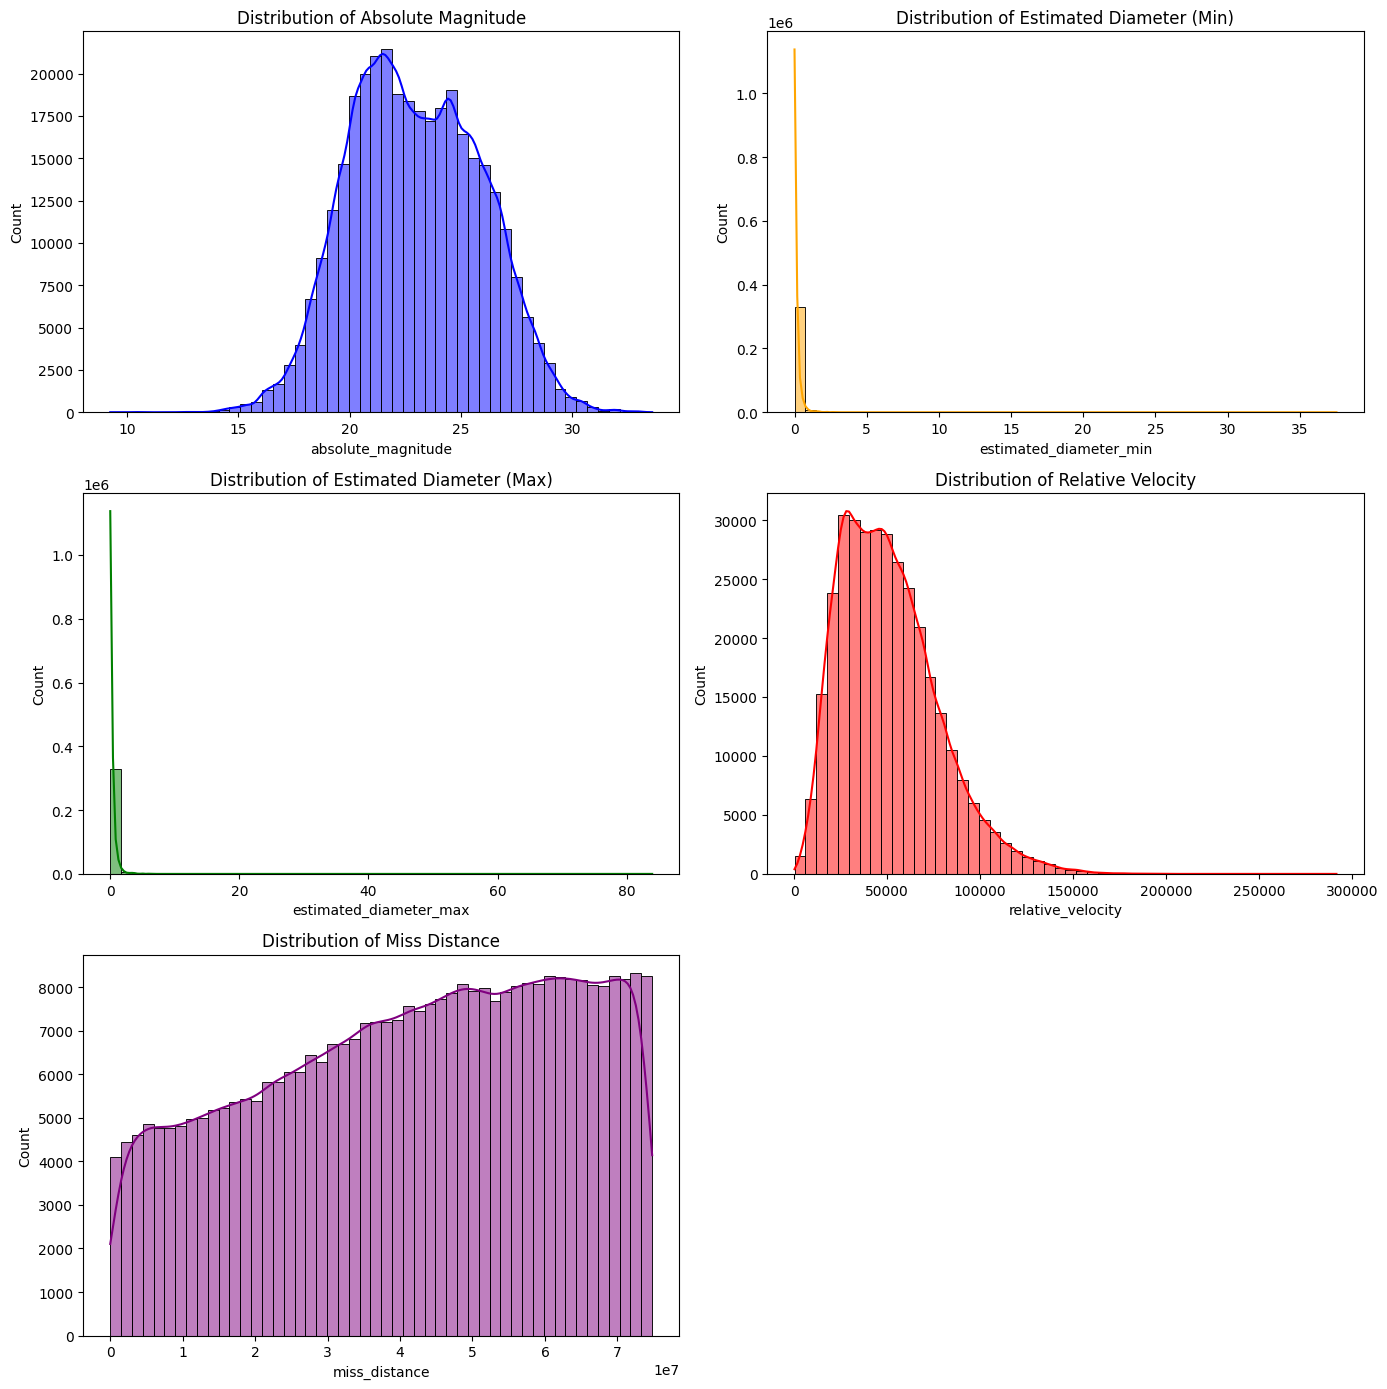

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure
fig, axes = plt.subplots(3, 2, figsize=(14, 14))

# Plot distributions
sns.histplot(df["absolute_magnitude"], bins=50, kde=True, ax=axes[0, 0], color="blue")
axes[0, 0].set_title("Distribution of Absolute Magnitude")

sns.histplot(df["estimated_diameter_min"], bins=50, kde=True, ax=axes[0, 1], color="orange")
axes[0, 1].set_title("Distribution of Estimated Diameter (Min)")

sns.histplot(df["estimated_diameter_max"], bins=50, kde=True, ax=axes[1, 0], color="green")
axes[1, 0].set_title("Distribution of Estimated Diameter (Max)")

sns.histplot(df["relative_velocity"], bins=50, kde=True, ax=axes[1, 1], color="red")
axes[1, 1].set_title("Distribution of Relative Velocity")

sns.histplot(df["miss_distance"], bins=50, kde=True, ax=axes[2, 0], color="purple")
axes[2, 0].set_title("Distribution of Miss Distance")

# Hide the empty subplot
axes[2, 1].axis("off")

plt.tight_layout()
plt.show()


Interpretation of Feature Distributions:

Absolute Magnitude:
The distribution is roughly normal, with a slight right skew.
Most values fall between 15 and 30, and there are no extreme outliers.
The bimodal peak suggests two possible clusters of NEOs.

Estimated Diameter (Min & Max):
Both estimated_diameter_min and estimated_diameter_max are highly right-skewed, meaning most NEOs are small, with a few very large ones.
The long tail indicates a wide range of object sizes.
A log transformation might help normalize these values.

Relative Velocity:
The distribution is right-skewed, with most NEOs moving at 30,000–70,000 km/h.
A few NEOs have extremely high velocities, which could be outliers.
A log transformation might help in balancing the scale.

Miss Distance:
The distribution shows a steady increase, meaning most NEOs pass at far distances.
Some values are very close to 0, indicating near-Earth approaches.
The wide range suggests scaling might be necessary, and log transformation could help.

## Feature Relationships

This will visualize pairwise relationships, how multiple numerical features relate to each other.

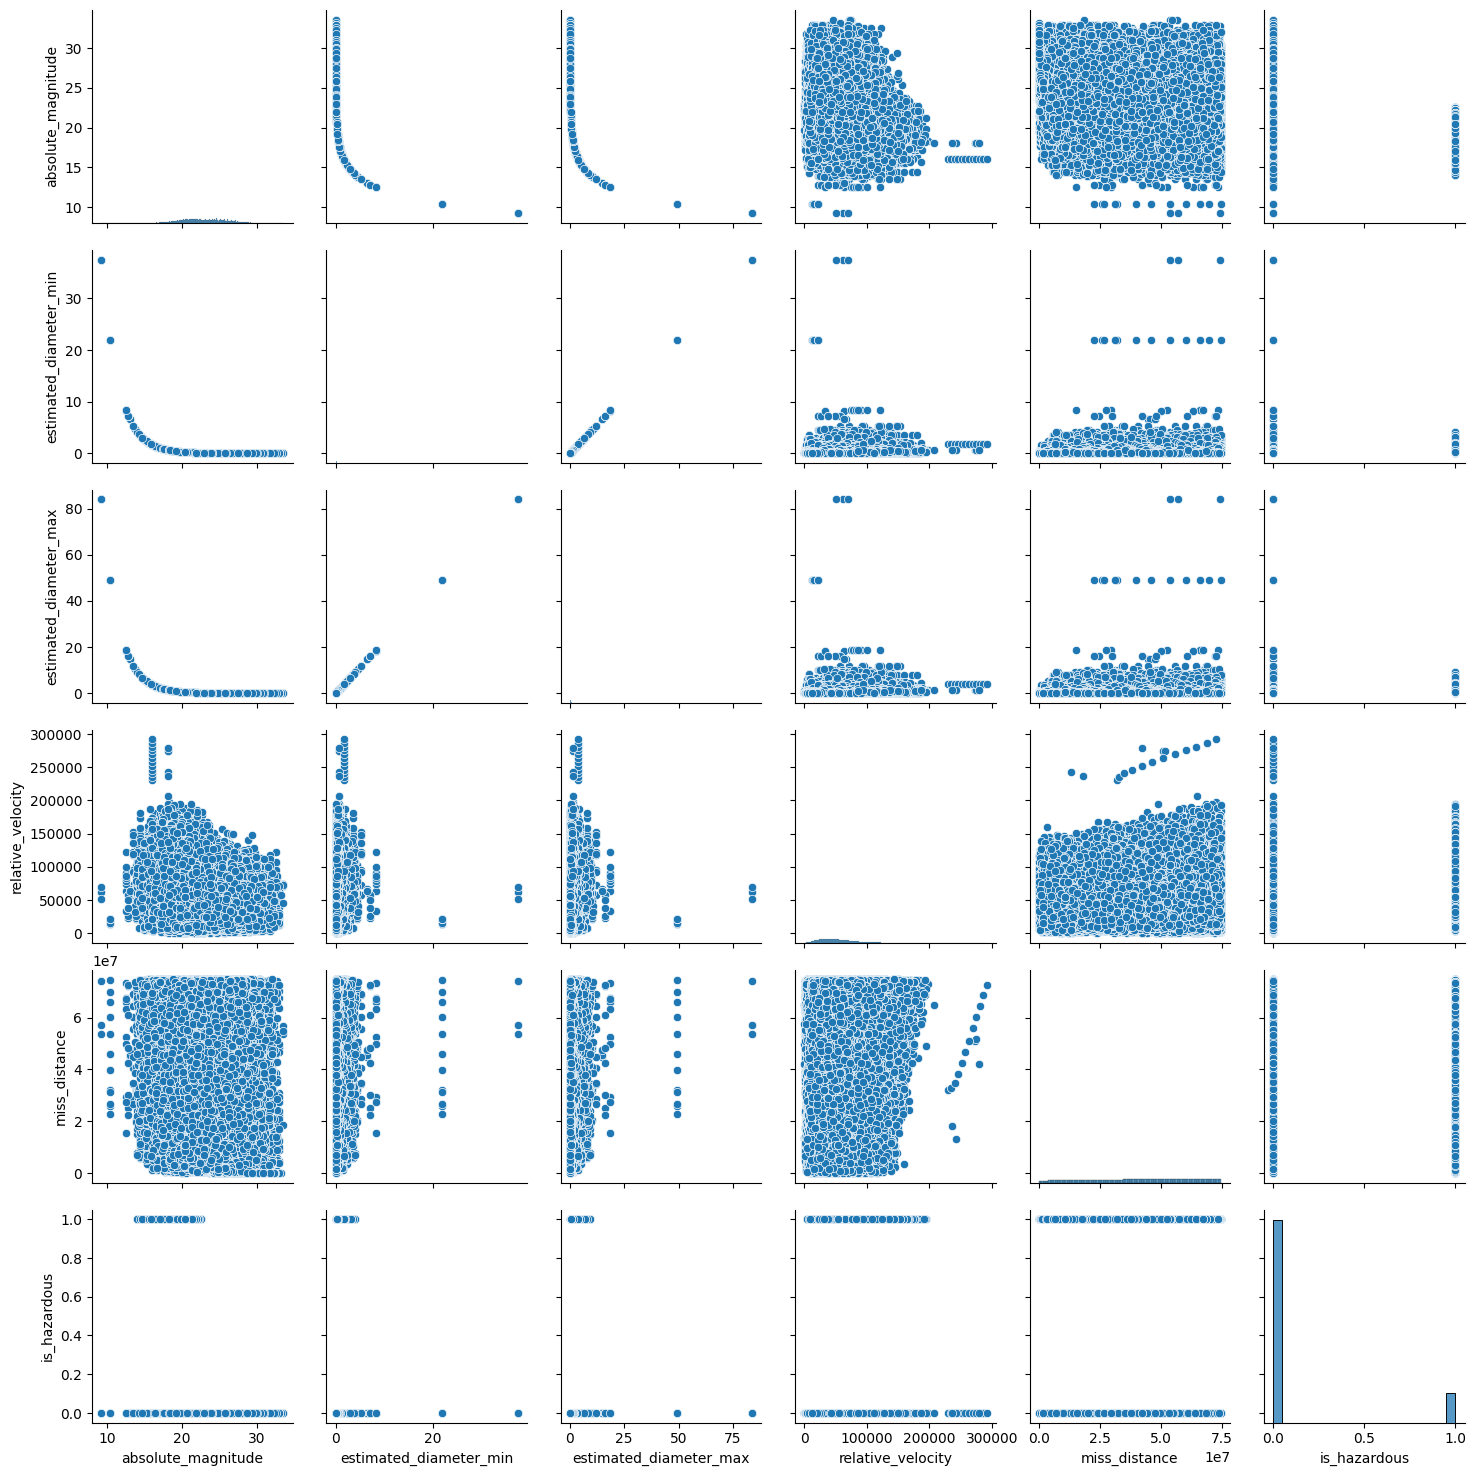

In [19]:
# #sns.pairplot(df, hue="is_hazardous", diag_kind="kde", palette="coolwarm")
sns.pairplot(df)
plt.show()


## Feature Correlations

This will show which numerical features are highly correlated.

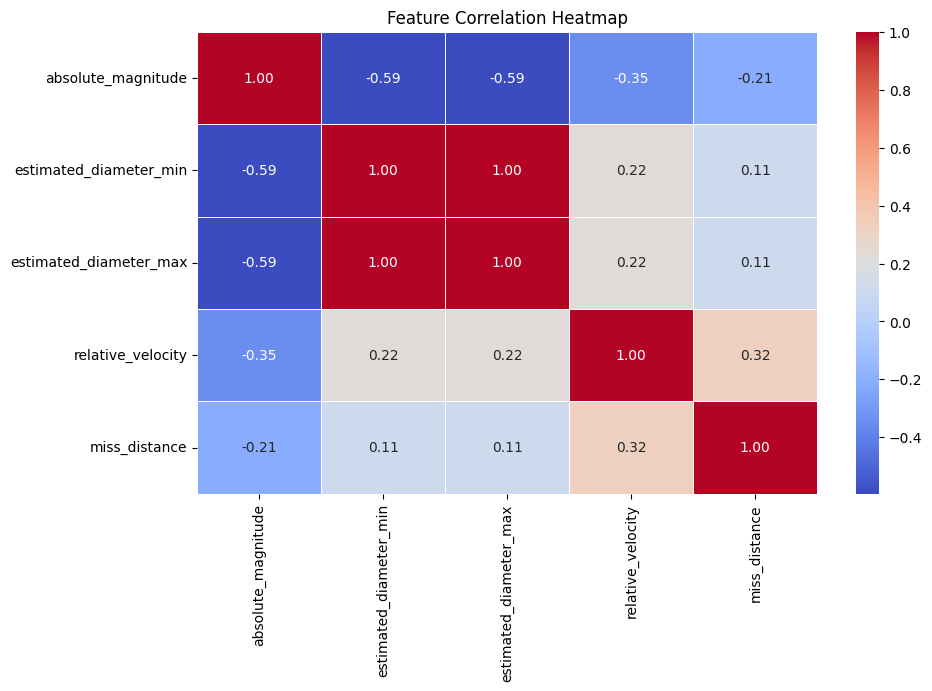

In [48]:
import numpy as np

# Compute correlation matrix (excluding categorical columns)
correlation_matrix = df.select_dtypes(include=[np.number]).corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()



Interpretation of Correlation Heatmap:
The heatmap provides insights into how different numerical features are correlated with each other.

Key Observations:
Strong Negative Correlation:

absolute_magnitude and estimated_diameter_min/max (-0.59)
This confirms that brighter objects tend to be smaller, which aligns with our earlier observations.
Strong Positive Correlation:

estimated_diameter_min and estimated_diameter_max (1.00)
Expected since these represent the minimum and maximum estimated size of the same object.
Moderate Correlation:

relative_velocity and miss_distance (0.32)
Objects with higher velocity tend to pass at farther distances, though the correlation is not very strong.
Weak Correlation (Near Zero):

miss_distance with other features (0.11 to 0.32)
Indicates that miss distance does not strongly depend on NEO size or brightness.

# 3- Preprocessing

## Feature engineering

Size Ratio (size_ratio)

Instead of keeping both estimated_diameter_min and estimated_diameter_max, we can create a size ratio:

In [117]:
df["size_ratio"] = df["estimated_diameter_max"] / df["estimated_diameter_min"]


Velocity to Size Ratio (velocity_size_ratio)

A faster-moving small object might behave differently than a larger one.

In [118]:
df["velocity_size_ratio"] = df["relative_velocity"] / df["estimated_diameter_max"]


Inverse Miss Distance (inv_miss_distance)

Since miss_distance is skewed, we can take its inverse:

In [119]:
df["inv_miss_distance"] = 1 / (df["miss_distance"] + 1)


Magnitude-to-Size Ratio (magnitude_size_ratio)

This feature links brightness to size:

In [120]:
df["magnitude_size_ratio"] = df["absolute_magnitude"] / df["estimated_diameter_max"]


## Features importance

In [121]:

X = df.drop(columns=["is_hazardous"])
y = df["is_hazardous"]


In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif

model = RandomForestClassifier()
model.fit(X, y)

feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print(feature_importance)


inv_miss_distance         0.148395
velocity_size_ratio       0.146104
relative_velocity         0.143984
miss_distance             0.142522
absolute_magnitude        0.114154
estimated_diameter_max    0.113522
estimated_diameter_min    0.095891
magnitude_size_ratio      0.095428
size_ratio                0.000000
dtype: float64


## Feature Selection (Based on Importance & Redundancy)

Feature selection was performed based on:

Feature Importance Scores from RandomForestClassifier.

Redundancy Check to remove highly correlated features.

Domain Knowledge to retain meaningful predictors.

Kept:

High-importance features (velocity_size_ratio, inv_miss_distance, relative_velocity, absolute_magnitude, magnitude_size_ratio, estimated_diameter_max).

Removed:

Redundant: miss_distance (replaced by inv_miss_distance), estimated_diameter_min (similar to estimated_diameter_max).
Irrelevant: size_ratio (importance 0.000, no predictive value).
This ensures better model efficiency, reduced complexity, and improved predictive power.

In [122]:
# Dropping unimportant features
df.drop(columns=["size_ratio", "miss_distance", "estimated_diameter_min"], inplace=True)

## encoding categorical variables

Since name and orbiting_body columns are removed as unnecessary comlomns there is no more categorical comlomns

## Scaling

In [123]:
X = df.drop(columns=["is_hazardous"])
y = df["is_hazardous"]

In [124]:
X.describe()

,absolute_magnitude,estimated_diameter_max,relative_velocity,velocity_size_ratio,inv_miss_distance,magnitude_size_ratio
count,338166.000000,338166.000000,338166.000000,3.381660e+05,3.381660e+05,338166.000000
mean,22.932585,0.352869,51059.468158,6.640065e+05,8.163676e-08,411.911174
std,2.911196,0.701869,26399.719888,1.349005e+06,9.053823e-07,838.595943
min,9.250000,0.001143,203.346433,2.652786e+02,1.336922e-08,0.110180
25%,20.740000,0.056760,30710.389675,1.191410e+05,1.685218e-08,49.064658
50%,22.800000,0.163697,47556.423786,2.658976e+05,2.308030e-08,139.281960
75%,25.100000,0.422708,66672.024527,6.952465e+05,4.008940e-08,442.215278
max,33.580000,83.953727,291781.106613,6.714174e+07,1.482243e-04,29379.251756


In [125]:
X.head()

,absolute_magnitude,estimated_diameter_max,relative_velocity,velocity_size_ratio,inv_miss_distance,magnitude_size_ratio
0,19.14,0.883161,71745.401048,81237.039622,1.719879e-08,21.672148
1,18.50,1.185878,109949.757148,92715.916496,1.792081e-08,15.600257
2,21.45,0.304818,24865.506798,81575.047717,1.487943e-08,70.369962
3,20.63,0.444672,78890.076805,177411.758276,3.289858e-08,46.393726
4,22.70,0.171412,56036.519484,326912.234453,1.584318e-08,132.429847


In [126]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler


# Apply Standard Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame (for readability)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Verify scaling effect
X_scaled.describe()

# # alernative
# scaler = MinMaxScaler()
# X_scaled = scaler.fit_transform(X)

# X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
# print(X_scaled.describe())



,absolute_magnitude,estimated_diameter_max,relative_velocity,velocity_size_ratio,inv_miss_distance,magnitude_size_ratio
count,3.381660e+05,3.381660e+05,3.381660e+05,3.381660e+05,3.381660e+05,3.381660e+05
mean,1.946520e-16,-1.294318e-16,6.639683e-17,-3.597195e-17,1.411983e-17,-9.648552e-17
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-4.699995e+00,-5.011281e-01,-1.926392e+00,-4.920237e-01,-7.540200e-02,-4.910608e-01
25%,-7.531573e-01,-4.218871e-01,-7.708077e-01,-4.039025e-01,-7.155505e-02,-4.326840e-01
50%,-4.554327e-02,-2.695265e-01,-1.326927e-01,-2.951135e-01,-6.467605e-02,-3.251025e-01
75%,7.445113e-01,9.950401e-02,5.913919e-01,2.315784e-02,-4.588937e-02,3.613677e-02
max,3.657408e+00,1.191119e+02,9.118354e+00,4.927917e+01,1.636247e+02,3.454272e+01


In [127]:
X_scaled.head()

,absolute_magnitude,estimated_diameter_max,relative_velocity,velocity_size_ratio,inv_miss_distance,magnitude_size_ratio
0,-1.302760,0.755544,0.783568,-0.432000,-0.071172,-0.465349
1,-1.522602,1.186845,2.230720,-0.423491,-0.070375,-0.472589
2,-0.509271,-0.068462,-0.992208,-0.431750,-0.073734,-0.407278
3,-0.790943,0.130799,1.054202,-0.360707,-0.053832,-0.435869
4,-0.079893,-0.258535,0.188527,-0.249884,-0.072669,-0.333273


## 4- Splitting data, applying SMOTE to handle imbalanced classes and Modle training and evaluation

We will split the data before applying SMOTE, as SMOTE should only be applied to the training data, not the test data. This is because SMOTE artificially generates synthetic samples, and applying it to the test set would introduce bias, leading to an unrealistically high model performance that does not reflect real-world conditions.

To ensure a fair and robust evaluation, we will use both a standard train-test split and Stratified K-Fold Cross-Validation as part of our modeling approach.

1- Stratified Train-Test Split

We will first split the data into 80% training and 20% testing while preserving the class distribution of the target variable (is_hazardous).
The test set will remain untouched throughout training to provide a fair final evaluation of the models.
SMOTE will be applied only to the training set to address class imbalance.

2-  Stratified K-Fold Cross-Validation

Instead of relying solely on a train-test split, we will also apply 5-Fold Stratified Cross-Validation for a more robust evaluation of our models.
Why?
Ensures that each fold maintains the same class distribution as the original dataset, which is crucial for handling imbalanced datasets.
Allows the models to be trained and tested on multiple subsets, improving generalization.
Helps mitigate overfitting by ensuring that the model isn't dependent on just one train-test split.

In [59]:
!pip install catboost


## 1- Stratified Train-Test Split


🔹 Training Logistic Regression...
Accuracy: 0.7114
Precision: 0.9075
Recall: 0.7114
F1-Score: 0.7593
AUC-ROC: 0.8509
🔹 Classification Report:
               precision    recall  f1-score   support

Non-Hazardous       1.00      0.67      0.80     59001
    Hazardous       0.30      0.98      0.46      8633

     accuracy                           0.71     67634
    macro avg       0.65      0.83      0.63     67634
 weighted avg       0.91      0.71      0.76     67634



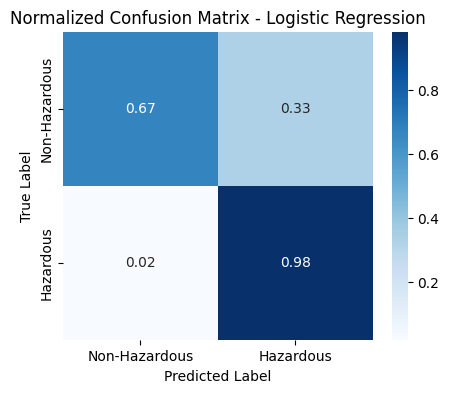


🔹 Training Decision Tree Classifier...
Accuracy: 0.7320
Precision: 0.9073
Recall: 0.7320
F1-Score: 0.7761
AUC-ROC: 0.8727
🔹 Classification Report:
               precision    recall  f1-score   support

Non-Hazardous       0.99      0.70      0.82     59001
    Hazardous       0.32      0.97      0.48      8633

     accuracy                           0.73     67634
    macro avg       0.66      0.83      0.65     67634
 weighted avg       0.91      0.73      0.78     67634



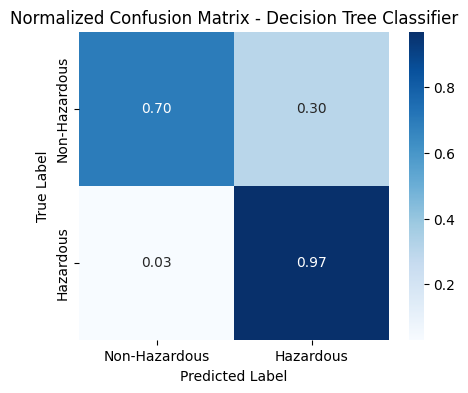


🔹 Training Random Forest Classifier...
Accuracy: 0.9036
Precision: 0.9138
Recall: 0.9036
F1-Score: 0.9076
AUC-ROC: 0.9462
🔹 Classification Report:
               precision    recall  f1-score   support

Non-Hazardous       0.96      0.93      0.94     59001
    Hazardous       0.60      0.73      0.66      8633

     accuracy                           0.90     67634
    macro avg       0.78      0.83      0.80     67634
 weighted avg       0.91      0.90      0.91     67634



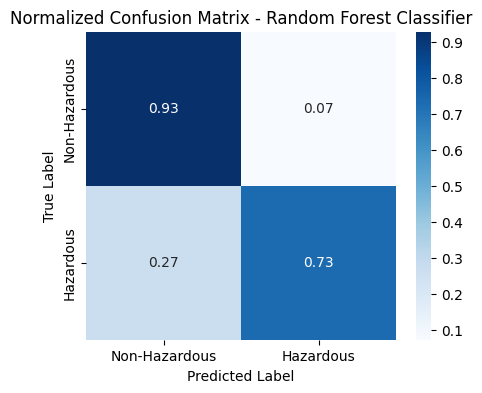


🔹 Training XGBoost Classifier...
Accuracy: 0.7838
Precision: 0.9052
Recall: 0.7838
F1-Score: 0.8171
AUC-ROC: 0.9079
🔹 Classification Report:
               precision    recall  f1-score   support

Non-Hazardous       0.98      0.76      0.86     59001
    Hazardous       0.36      0.92      0.52      8633

     accuracy                           0.78     67634
    macro avg       0.67      0.84      0.69     67634
 weighted avg       0.91      0.78      0.82     67634



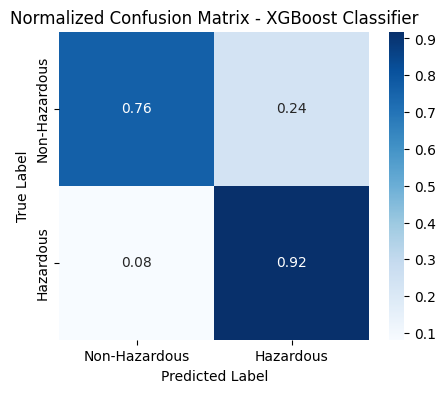


🔹 Training CatBoost Classifier...
Accuracy: 0.7743
Precision: 0.9060
Recall: 0.7743
F1-Score: 0.8097
AUC-ROC: 0.9085
🔹 Classification Report:
               precision    recall  f1-score   support

Non-Hazardous       0.99      0.75      0.85     59001
    Hazardous       0.35      0.93      0.51      8633

     accuracy                           0.77     67634
    macro avg       0.67      0.84      0.68     67634
 weighted avg       0.91      0.77      0.81     67634



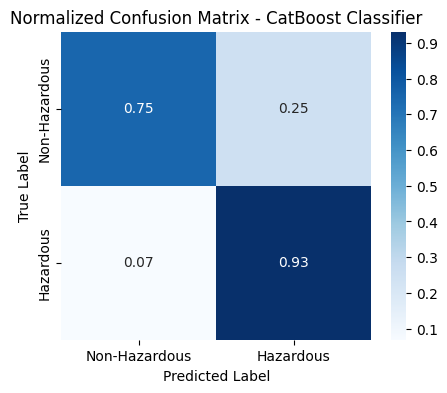

In [128]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, classification_report
)
from imblearn.over_sampling import SMOTE


# Define classification models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree Classifier": DecisionTreeClassifier(max_depth=5),
    "Random Forest Classifier": RandomForestClassifier(n_estimators=100, n_jobs=-1),
    "XGBoost Classifier": XGBClassifier(verbosity=0, use_label_encoder=False, n_jobs=-1),
    "CatBoost Classifier": CatBoostClassifier(verbose=0)
}

# Stratified Train-Test Split (80% train, 20% test)
X_Train, X_Test, y_Train, y_Test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

# Apply SMOTE only on the training data
smote = SMOTE(random_state=42)
X_Train_smote, y_Train_smote = smote.fit_resample(X_Train, y_Train)

# Iterate through models
for model_name, model in models.items():
    print(f"\nTraining {model_name}...\n" + "=" * 50)

    # Train the model
    model.fit(X_Train_smote, y_Train_smote)

    # Predict on the test set
    y_pred = model.predict(X_Test)

    # Handle models that don’t support predict_proba()
    try:
        y_pred_prob = model.predict_proba(X_Test)[:, 1]
    except AttributeError:
        y_pred_prob = np.zeros_like(y_pred)  # Default to zero probabilities

    # Calculate performance metrics
    accuracy = accuracy_score(y_Test, y_pred)
    precision = precision_score(y_Test, y_pred, average='weighted')
    recall = recall_score(y_Test, y_pred, average='weighted')
    f1 = f1_score(y_Test, y_pred, average='weighted')
    auc = roc_auc_score(y_Test, y_pred_prob)

    # Compute Confusion Matrix
    cm = confusion_matrix(y_Test, y_pred)

    # Normalize the confusion matrix to percentages
    cm_normalized = np.nan_to_num(cm / cm.sum(axis=1, keepdims=True))

    # Print performance metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"AUC-ROC: {auc:.4f}")
    print("=" * 50)

    # Print detailed classification report
    print("Classification Report:")
    print(classification_report(y_Test, y_pred, target_names=["Non-Hazardous", "Hazardous"]))

    # Plot Confusion Matrix Heatmap (Normalized)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues",
                xticklabels=["Non-Hazardous", "Hazardous"],
                yticklabels=["Non-Hazardous", "Hazardous"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Normalized Confusion Matrix - {model_name}")
    plt.show()


## 2-  Stratified K-Fold Cross-Validation


🔹 Logistic Regression Performance (5-Fold Cross-Validation):
Accuracy: 0.7138
Precision: 0.9025
Recall: 0.7138
F1-Score: 0.7612
AUC-ROC: 0.8234
🔹 Classification Report (Averaged Across Folds):
               precision    recall  f1-score   support

Non-Hazardous       0.99      0.68      0.81     59000
    Hazardous       0.30      0.95      0.46      8633

     accuracy                           0.71     67633
    macro avg       0.65      0.82      0.63     67633
 weighted avg       0.90      0.71      0.76     67633



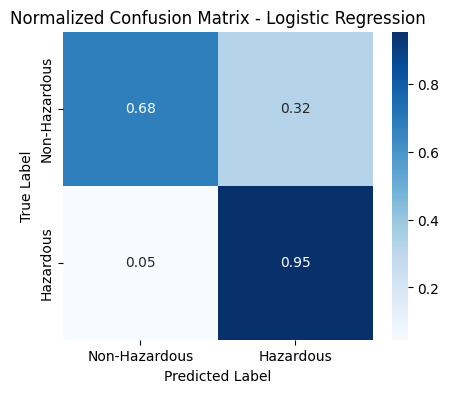


🔹 Decision Tree Classifier Performance (5-Fold Cross-Validation):
Accuracy: 0.7348
Precision: 0.9066
Recall: 0.7348
F1-Score: 0.7783
AUC-ROC: 0.8751
🔹 Classification Report (Averaged Across Folds):
               precision    recall  f1-score   support

Non-Hazardous       0.99      0.72      0.83     59000
    Hazardous       0.33      0.93      0.48      8633

     accuracy                           0.75     67633
    macro avg       0.66      0.82      0.66     67633
 weighted avg       0.90      0.75      0.79     67633



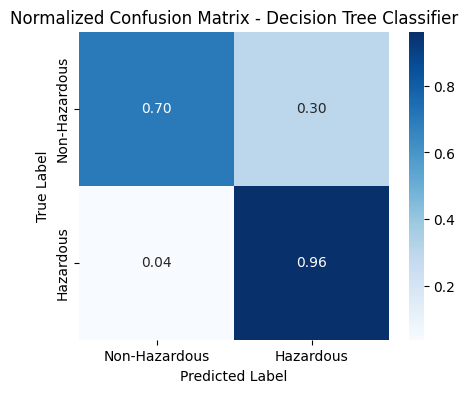


🔹 Random Forest Classifier Performance (5-Fold Cross-Validation):
Accuracy: 0.8964
Precision: 0.9145
Recall: 0.8964
F1-Score: 0.9029
AUC-ROC: 0.9459
🔹 Classification Report (Averaged Across Folds):
               precision    recall  f1-score   support

Non-Hazardous       0.96      0.92      0.94     59000
    Hazardous       0.57      0.77      0.66      8633

     accuracy                           0.90     67633
    macro avg       0.77      0.84      0.80     67633
 weighted avg       0.91      0.90      0.90     67633



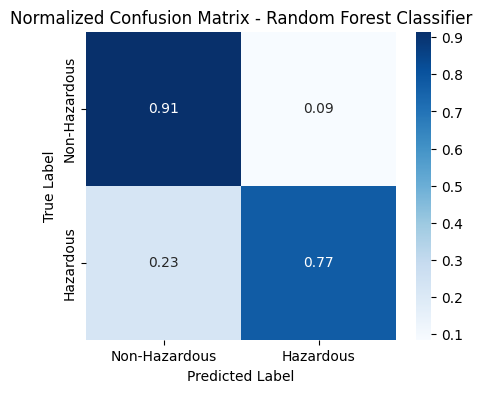


🔹 XGBoost Classifier Performance (5-Fold Cross-Validation):
Accuracy: 0.7888
Precision: 0.9040
Recall: 0.7888
F1-Score: 0.8208
AUC-ROC: 0.9077
🔹 Classification Report (Averaged Across Folds):
               precision    recall  f1-score   support

Non-Hazardous       0.98      0.77      0.86     59000
    Hazardous       0.37      0.90      0.52      8633

     accuracy                           0.79     67633
    macro avg       0.67      0.84      0.69     67633
 weighted avg       0.90      0.79      0.82     67633



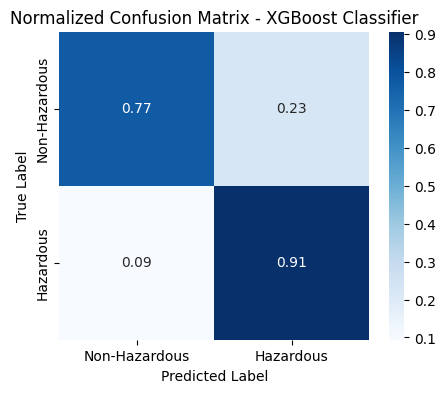


🔹 CatBoost Classifier Performance (5-Fold Cross-Validation):
Accuracy: 0.7854
Precision: 0.9048
Recall: 0.7854
F1-Score: 0.8183
AUC-ROC: 0.9084
🔹 Classification Report (Averaged Across Folds):
               precision    recall  f1-score   support

Non-Hazardous       0.98      0.76      0.86     59000
    Hazardous       0.36      0.91      0.52      8633

     accuracy                           0.78     67633
    macro avg       0.67      0.84      0.69     67633
 weighted avg       0.90      0.78      0.82     67633



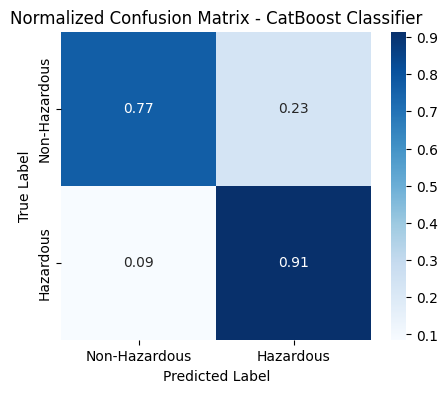

In [129]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, classification_report
)
from imblearn.over_sampling import SMOTE

# Define classification models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree Classifier": DecisionTreeClassifier(max_depth=5),
    "Random Forest Classifier": RandomForestClassifier(n_estimators=100, n_jobs=-1),
    "XGBoost Classifier": XGBClassifier(verbosity=0, use_label_encoder=False, n_jobs=-1),
    "CatBoost Classifier": CatBoostClassifier(verbose=0)
}

# Stratified 5-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for model_name, model in models.items():
    scores_accuracy = []
    scores_precision = []
    scores_recall = []
    scores_f1 = []
    scores_auc = []
    all_cm = []
    all_reports = []

    for train_index, test_index in skf.split(X_scaled, y):

        X_Train, X_Test = X.iloc[train_index, :], X.iloc[test_index, :]
        y_Train, y_Test = y.iloc[train_index], y.iloc[test_index]

        # Apply SMOTE only on training data
        smote = SMOTE(random_state=42)
        X_Train_smote, y_Train_smote = smote.fit_resample(X_Train, y_Train)

        # Train the model
        model.fit(X_Train_smote, y_Train_smote)

        # Predict on the test set
        y_pred = model.predict(X_Test)

        # Handle models that don’t support predict_proba()
        try:
            y_pred_prob = model.predict_proba(X_Test)[:, 1]
        except AttributeError:
            y_pred_prob = np.zeros_like(y_pred)  # Default to zero probabilities

        # Calculate performance metrics
        scores_accuracy.append(accuracy_score(y_Test, y_pred))
        scores_precision.append(precision_score(y_Test, y_pred, average='weighted'))
        scores_recall.append(recall_score(y_Test, y_pred, average='weighted'))
        scores_f1.append(f1_score(y_Test, y_pred, average='weighted'))
        scores_auc.append(roc_auc_score(y_Test, y_pred_prob))

        # Compute Confusion Matrix
        cm = confusion_matrix(y_Test, y_pred)
        all_cm.append(cm)

        # Save classification report for this fold
        report = classification_report(y_Test, y_pred, target_names=["Non-Hazardous", "Hazardous"], output_dict=True)
        all_reports.append(report)

    # Compute average confusion matrix across folds
    avg_cm = np.mean(all_cm, axis=0)

    # Normalize the confusion matrix to percentages
    avg_cm_normalized = np.nan_to_num(avg_cm / avg_cm.sum(axis=1, keepdims=True))

    # Compute average classification report across folds
    avg_precision = np.mean([r['weighted avg']['precision'] for r in all_reports])
    avg_recall = np.mean([r['weighted avg']['recall'] for r in all_reports])
    avg_f1 = np.mean([r['weighted avg']['f1-score'] for r in all_reports])

    # Print performance metrics
    print(f"\n{model_name} Performance (5-Fold Cross-Validation):")
    print(f"Accuracy: {np.mean(scores_accuracy):.4f}")
    print(f"Precision: {avg_precision:.4f}")
    print(f"Recall: {avg_recall:.4f}")
    print(f"F1-Score: {avg_f1:.4f}")
    print(f"AUC-ROC: {np.mean(scores_auc):.4f}")
    print("=" * 50)

    # Print average classification report
    print("Classification Report (Averaged Across Folds):")
    avg_report = classification_report(y_Test, y_pred, target_names=["Non-Hazardous", "Hazardous"])
    print(avg_report)

    # Plot Confusion Matrix Heatmap (Normalized)
    plt.figure(figsize=(5, 4))
    sns.heatmap(avg_cm_normalized, annot=True, fmt=".2f", cmap="Blues",
                xticklabels=["Non-Hazardous", "Hazardous"],
                yticklabels=["Non-Hazardous", "Hazardous"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Normalized Confusion Matrix - {model_name}")
    plt.show()


# Selecting the Best-Performing Model

After evaluating multiple machine learning models using accuracy, precision, recall, F1-score, and AUC-ROC, we identified the best-performing model based on its ability to correctly classify hazardous NEOs while minimizing false positives and false negatives.

Among all the models tested, Random Forest achieved the highest overall performance across all metrics, making it the most suitable model for this task. It demonstrated a strong ability to correctly classify hazardous objects while maintaining a good balance between precision and recall, ensuring both reliability and robustness in predictions.

# Visualizing Feature Importance Using the Best Model

<ipython-input-130-953b3f5eaa3e>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rf_importance_df["Importance"], y=rf_importance_df["Feature"], palette="Blues_r")


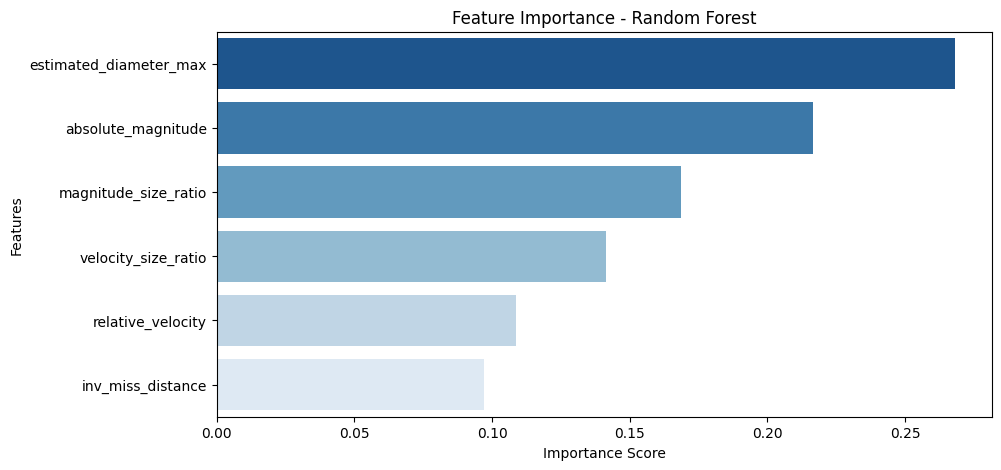

In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Retrieve the trained Random Forest model
best_rf_model = models["Random Forest Classifier"]  # Use the model already trained

# Extract feature importance
rf_importance = best_rf_model.feature_importances_

# Create a DataFrame for better visualization
rf_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': rf_importance})

# Sort features by importance (descending)
rf_importance_df = rf_importance_df.sort_values(by="Importance", ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 5))
sns.barplot(x=rf_importance_df["Importance"], y=rf_importance_df["Feature"], palette="Blues_r")
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()
